# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable

## Authors

Ângelo Figueiral, Diogo Nasser, Pedro Rolim, and Ricardo Araújo.

## External links and resources

Lisbon metro stations: http://dados.cm-lisboa.pt/dataset/estacoes-de-metro

## Introduction

In the age of smartphones, reality-simulating videogames, self-driving cars (and AI in general), one often feels disconected from nature, and prossibly even from reality. These global feelings seem to have been deepened even further by the COVID-19 pandemic, especially in big cities. **Green parks** are often the only quick escape that people in big cities like Lisbon and Porto have from the stress, noises, and smells of urban life. These places offer great chances to wander around, play some sports, eat some ice cream, or just hang out with some friends While going to these places is ultimately in the hands of the people, there is a lot that municipalities can do to make these places more attractive. A [paper](http://media1.cagd.co.uk/7/696497_8bf035.pdf) from 2002 on a study conducting in England provides some crucial insight for cities to attain just that - more attractive parks:

#### Some general characteristics to attract people idenfitified in the literature are:
- Being free, of open access all day, every day, with non discriminatory access;
- Having events and activities specifically targeted to young people;
- Design is key: District and local green spaces that are a community resource need to be designed with and for the community that will use them, requiring a different approach and different skills from the designer.

#### The same piece of research also shows that:

- Urban green spaces can act as catalysts for wider community initiatives in ways that no other public facility seems able to achieve in similar circumstances.
- Many policymakers have underestimated the role that urban green space can play in urban regeneration. Many still think of parks and other urban green spaces as just ‘greenery’ or ‘landscaping’ and far removed from what they perceive to be the real problems of urban communities.
- Some 32% of people in urban areas are either non-users or infrequent users of urban green spaces.
-  Access issues are very significant.

**Because policymakers are the ones able to gradually create change, it is crucial to demonstrate them exactly how important green spaces are to urban regeneration and to urban communities in general, and precisely in which direction parks should change if they are to attract more people.**


### Our Goal

To find some crucial attributes for Portuguese cities, below we will be using a dataset with **64 green parks in the cities of Lisbon and Porto**, with the average demand for those places.

Because 64 rows is not enough to create very statistically significant models, we will also conduct a deep **qualitative** analysis in the process. We just hope not to bore you :) However, rest assured! We will also try and make the best of this dataset, mainly by trying out some different regression methods and a decision tree - to predict demand. While we expect high error rates, we hope to obtain the importance of the features in the output model, in order to understand

Because we believe different parks have different needs and "purposes", we will also build **one model that splits parks that accessible** (through the distance to the nearest metro station and the number of parking lots available) **and those that are not**, in order to check the differences in the importance of features in those two classes.


### Structure

1. EDA
2. Baseline model
3. Getting a Better Model
4. Accessible vs. Non Acessible Model
5. Conclusions

---

## Development

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import urllib.request, json

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

---

### Exploratory Data Analysis

In [9]:
green_df = pd.read_csv('WDL_Green_Areas_Dataset_V1.csv', sep='|', encoding='latin-1')

In [10]:
green_df

Green_Zone_name  \
0     ESPAÇO JOGO E RECREIO HOMEM DO LEME   
1     ESPAÇO JOGO E RECREIO HOMEM DO LEME   
2            JARDIM AFONSO DE ALBUQUERQUE   
3            JARDIM AFONSO DE ALBUQUERQUE   
4     JARDIM ALAMEDA CIDADE UNIVERSITÁRIA   
5     JARDIM ALAMEDA CIDADE UNIVERSITÁRIA   
6     JARDIM ALAMEDA DOM AFONSO HENRIQUES   
7     JARDIM ALAMEDA DOM AFONSO HENRIQUES   
8                 JARDIM AMÁLIA RODRIGUES   
9                 JARDIM AMÁLIA RODRIGUES   
10              JARDIM AMÉLIA CARVALHEIRA   
11              JARDIM AMÉLIA CARVALHEIRA   
12                   JARDIM ANTÓNIO NOBRE   
13                   JARDIM ANTÓNIO NOBRE   
14                  JARDIM AVELAR BROTERO   
15                  JARDIM AVELAR BROTERO   
16                   JARDIM BASÍLIO TELES   
17                   JARDIM BASÍLIO TELES   
18                   JARDIM BENTO MARTINS   
19                   JARDIM BENTO MARTINS   
20                 JARDIM BOTÂNICO LISBOA   
21                 JARDIM BOTÂNICO LISBOA   
22                  JARDIM BOTÂNICO PORTO   
23                  JARDIM BOTÂNICO PORTO   
24                JARDIM BRAAMCAMP FREIRE   
25                JARDIM BRAAMCAMP FREIRE   
26                     JARDIM CONSTANTINO   
27                     JARDIM CONSTANTINO   
28                     JARDIM DA BOAVISTA   
29                     JARDIM DA BOAVISTA   
30                    JARDIM DA CORUJEIRA   
31                    JARDIM DA CORUJEIRA   
32                          JARDIM DA LUZ   
33                          JARDIM DA LUZ   
34             JARDIM DA RIBEIRA DAS NAUS   
35             JARDIM DA RIBEIRA DAS NAUS   
36                   JARDIM DAS AMOREIRAS   
37                   JARDIM DAS AMOREIRAS   
38                      JARDIM DE BUCELAS   
39                      JARDIM DE BUCELAS   
40            JARDIM DE LOPES DE MENDONÇA   
41            JARDIM DE LOPES DE MENDONÇA   
42                       JARDIM DE SANTOS   
43                       JARDIM DE SANTOS   
44                JARDIM DE TEÓFILO BRAGA   
45                JARDIM DE TEÓFILO BRAGA   
46                 JARDIM DO ARCO DO CEGO   
47                 JARDIM DO ARCO DO CEGO   
48                 JARDIM DO CAMPO GRANDE   
49                 JARDIM DO CAMPO GRANDE   
50                JARDIM DO CAMPO PEQUENO   
51                JARDIM DO CAMPO PEQUENO   
52             JARDIM DO PALÁCIO DA BOLSA   
53             JARDIM DO PALÁCIO DA BOLSA   
54       JARDIM DO PALÁCIO DE BEAU-SÉJOUR   
55       JARDIM DO PALÁCIO DE BEAU-SÉJOUR   
56           JARDIM DO PALÁCIO DE CRISTAL   
57           JARDIM DO PALÁCIO DE CRISTAL   
58                JARDIM DO PRÍNCIPE REAL   
59                JARDIM DO PRÍNCIPE REAL   
60                      JARDIM DOM LUÍS I   
61                      JARDIM DOM LUÍS I   
62                  JARDIM FERNANDO PESSA   
63                  JARDIM FERNANDO PESSA   
64       JARDIM FRANCISCO CALDEIRA CABRAL   
65       JARDIM FRANCISCO CALDEIRA CABRAL   
66           JARDIM FRANCISCO SÁ CARNEIRO   
67           JARDIM FRANCISCO SÁ CARNEIRO   
68    JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN   
69    JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN   
70                    JARDIM GARCIA DORTA   
71                    JARDIM GARCIA DORTA   
72                      JARDIM IRMÃ LÚCIA   
73                      JARDIM IRMÃ LÚCIA   
74         JARDIM JOÃO FREDERICO LUDOVICE   
75         JARDIM JOÃO FREDERICO LUDOVICE   
76                   JARDIM LISBOA ANTIGA   
77                   JARDIM LISBOA ANTIGA   
78                   JARDIM NOVE DE ABRIL   
79                   JARDIM NOVE DE ABRIL   
80                   JARDIM PAULO VALLADA   
81                   JARDIM PAULO VALLADA   
82      JARDIM PROF. ANTÓNIO SOUSA FRANCO   
83      JARDIM PROF. ANTÓNIO SOUSA FRANCO   
84      JRD. CP. VINTE E QUATRO DE AGOSTO   
85      JRD. CP. VINTE E QUATRO DE AGOSTO   
86                        MATA DE BENFICA   
87                        MATA DE BENFICA   
88             PARQUE

In [11]:
#Creating a new column with the daily average of non-residents in influence area and ordering the df 

rule = pd.Series(green_df[green_df['Resident'] == 1]['Daily average of people in influence area'].values, index = green_df['Green_Zone_name'].unique()).to_dict()

green_df['Daily average of people in influence area (Non-Residents)'] = green_df['Green_Zone_name'].map(rule)

green_df = green_df.drop(green_df[green_df.Resident == 1].index).reset_index()

green_df = green_df.drop('Resident', axis = 1)

green_df = green_df[['Green_Zone_name', 'Number of Museums in influence area', 
                     'Number of parking lots in influence area', 'Number of tourist attractions in influence area', 
                     'Green Zones Daily Average Demand', 'Daily average of people in influence area', 
                     'Daily average of people in influence area (Non-Residents)', 'Number of buildings in influence area', 
                     'Number of families in influence area','Number of people resident in influence area', 
                     'perc_senior_pop', 'perc_pop_until_19_yo', 'POINT_X', 'POINT_Y']]

green_df

Green_Zone_name  Number of Museums in influence area  \
0    ESPAÇO JOGO E RECREIO HOMEM DO LEME                                    5   
1           JARDIM AFONSO DE ALBUQUERQUE                                   93   
2    JARDIM ALAMEDA CIDADE UNIVERSITÁRIA                                    8   
3    JARDIM ALAMEDA DOM AFONSO HENRIQUES                                  105   
4                JARDIM AMÁLIA RODRIGUES                                    8   
5              JARDIM AMÉLIA CARVALHEIRA                                  104   
6                   JARDIM ANTÓNIO NOBRE                                   93   
7                  JARDIM AVELAR BROTERO                                   10   
8                   JARDIM BASÍLIO TELES                                   38   
9                   JARDIM BENTO MARTINS                                    5   
10                JARDIM BOTÂNICO LISBOA                                  105   
11                 JARDIM BOTÂNICO PORTO                                   25   
12               JARDIM BRAAMCAMP FREIRE                                   99   
13                    JARDIM CONSTANTINO                                  105   
14                    JARDIM DA BOAVISTA                                   19   
15                   JARDIM DA CORUJEIRA                                    5   
16                         JARDIM DA LUZ                                    0   
17            JARDIM DA RIBEIRA DAS NAUS                                   72   
18                  JARDIM DAS AMOREIRAS                                   13   
19                     JARDIM DE BUCELAS                                    0   
20           JARDIM DE LOPES DE MENDONÇA                                   97   
21                      JARDIM DE SANTOS                                   77   
22               JARDIM DE TEÓFILO BRAGA                                   16   
23                JARDIM DO ARCO DO CEGO                                   91   
24                JARDIM DO CAMPO GRANDE                                  107   
25               JARDIM DO CAMPO PEQUENO                                  104   
26            JARDIM DO PALÁCIO DA BOLSA                                   21   
27      JARDIM DO PALÁCIO DE BEAU-SÉJOUR                                    1   
28          JARDIM DO PALÁCIO DE CRISTAL                                   21   
29               JARDIM DO PRÍNCIPE REAL                                   73   
30                     JARDIM DOM LUÍS I                                  101   
31                 JARDIM FERNANDO PESSA                                   82   
32      JARDIM FRANCISCO CALDEIRA CABRAL                                    2   
33          JARDIM FRANCISCO SÁ CARNEIRO                                    2   
34   JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN                                   92   
35                   JARDIM GARCIA DORTA                                    3   
36                     JARDIM IRMÃ LÚCIA                                   14   
37        JARDIM JOÃO FREDERICO LUDOVICE                                    1   
38                  JARDIM LISBOA ANTIGA                                   73   
39                  JARDIM NOVE DE ABRIL                                  106   
40                  JARDIM PAULO VALLADA                                    0   
41     JARDIM PROF. ANTÓNIO SOUSA FRANCO                                   90   
42     JRD. CP. VINTE E QUATRO DE AGOSTO                                    0   
43                       MATA DE BENFICA                                    0   
44            PARQUE DA CIDADE DE LOURES                                    1   
45                   PARQUE DE SÃO ROQUE                                    3   
46                      PARQUE DOS ANJOS                                   46   
47                    PARQUE EDUARDO VII                                  107   
48       PARQUE INFANTIL CONDE DE BONFIM                

In [12]:
#Checking the longitudes to split the data between Lisboa and Porto areas

np.sort(green_df.POINT_Y.unique())

array([38.69674, 38.6996 , 38.70389, 38.70463, 38.70596, 38.7069 ,
       38.70705, 38.71166, 38.71502, 38.71662, 38.71742, 38.72178,
       38.72313, 38.72835, 38.72961, 38.73036, 38.73062, 38.7312 ,
       38.73467, 38.73638, 38.73755, 38.73757, 38.73805, 38.73919,
       38.73925, 38.73955, 38.7398 , 38.74128, 38.74231, 38.74308,
       38.74359, 38.74581, 38.74607, 38.74694, 38.74836, 38.74978,
       38.75181, 38.75294, 38.75482, 38.75755, 38.76014, 38.76021,
       38.76039, 38.76933, 38.76993, 38.77121, 38.78463, 38.79484,
       38.79877, 38.82598, 38.90102, 41.14118, 41.14839, 41.14934,
       41.15261, 41.15402, 41.15438, 41.15769, 41.15806, 41.15984,
       41.16001, 41.16273, 41.17106, 41.18237])

In [13]:
#Adding a column to the df with the city information

green_df['city'] = green_df['POINT_Y'].apply(lambda x: 'Porto' if x > 38.90102 else 'Lisboa')

In [14]:
geo_df = gpd.GeoDataFrame(
    green_df, geometry = gpd.points_from_xy(green_df.POINT_X, green_df.POINT_Y))

geo_df.crs = "EPSG:4326"
geo_df = geo_df.to_crs(epsg=3857)

In [15]:
geo_df.head()

Green_Zone_name  Number of Museums in influence area  \
0  ESPAÇO JOGO E RECREIO HOMEM DO LEME                                    5   
1         JARDIM AFONSO DE ALBUQUERQUE                                   93   
2  JARDIM ALAMEDA CIDADE UNIVERSITÁRIA                                    8   
3  JARDIM ALAMEDA DOM AFONSO HENRIQUES                                  105   
4              JARDIM AMÁLIA RODRIGUES                                    8   

   Number of parking lots in influence area  \
0                                        28   
1                                       129   
2                                        23   
3                                       175   
4                                         8   

   Number of tourist attractions in influence area  \
0                                               30   
1                                               78   
2                                                4   
3                                               84   
4                                                4   

   Green Zones Daily Average Demand  \
0                          3.728677   
1                         10.259113   
2                         47.347816   
3                         41.485945   
4                          5.768512   

   Daily average of people in influence area  \
0                               45787.629298   
1                               42877.741202   
2                               42877.741202   
3                                6008.626849   
4                               32809.647241   

   Daily average of people in influence area (Non-Residents)  \
0                                       17780.803014           
1                                       17497.825376           
2                                       17497.825376           
3                                       17235.051457           
4                                        7104.740926           

   Number of buildings in influence area  \
0                                   4783   
1                                   1775   
2                                   1775   
3                                   5028   
4                                   2472   

   Number of families in influence area  \
0                                 15352   
1                                 17185   
2                                 17185   
3                                 10598   
4                                  6729   

   Number of people resident in influence area  perc_senior_pop  \
0                                        38012         0.195123   
1                                        41163         0.161747   
2                                        41163         0.161747   
3                                        27362         0.161501   
4                                        15460         0.240815   

   perc_pop_until_19_yo  POINT_X   POINT_Y    city  \
0              0.196017 -8.68415  41.16001   Porto   
1              0.204917 -9.19949  38.69674  Lisboa   
2              0.204917 -9.15757  38.75294  Lisboa   
3              0.209341 -9.13207  38.73757  Lisboa   
4              0.163131 -9.15459  38.73062  Lisboa   

                           geometry  
0   POINT (-966715.156 5035971.828)  
1  POINT (-1024082.542 4678324.805)  
2  POINT (-1019416.029 4686343.881)  
3  POINT (-1016577.382 4684150.137)  
4  POINT (-1019084.297 4683158.326)

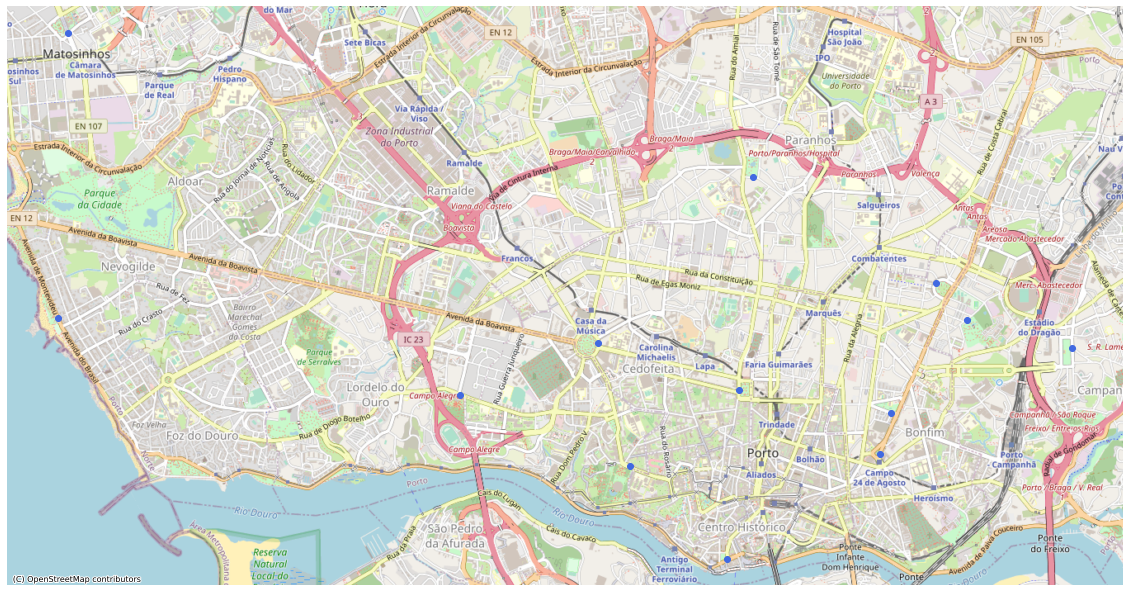

In [16]:
# Plotting the green spaces for Porto

ax = geo_df[geo_df.city == 'Porto']['geometry'].plot(figsize=(20, 20), color = 'royalblue', alpha = 1)

ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

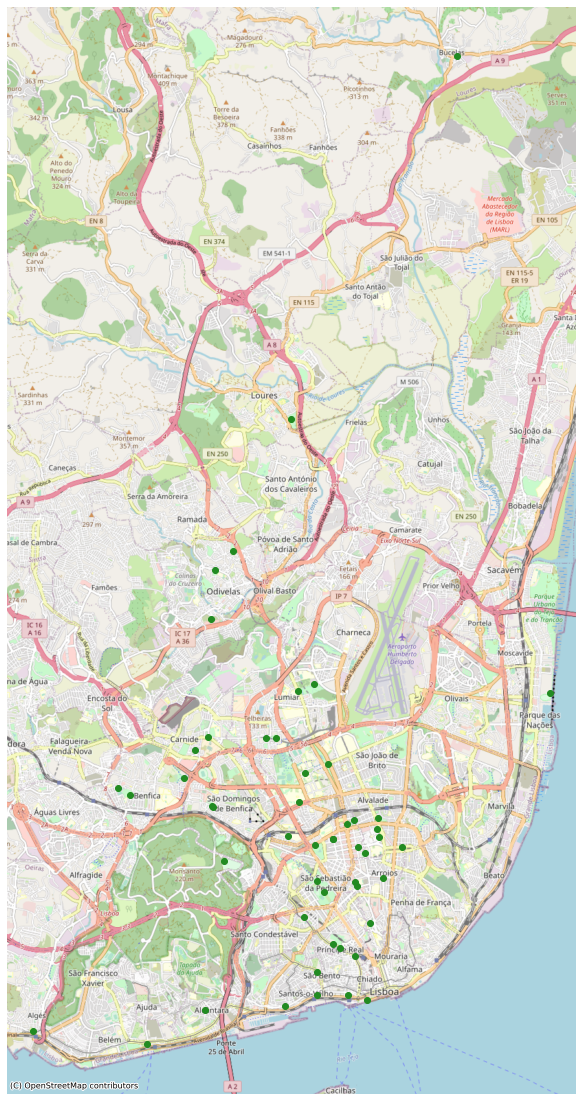

In [17]:
# Plotting the green spaces for Lisboa

ax = geo_df[geo_df.city == 'Lisboa']['geometry'].plot(figsize=(20, 20), color = 'forestgreen', alpha = 1)

ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

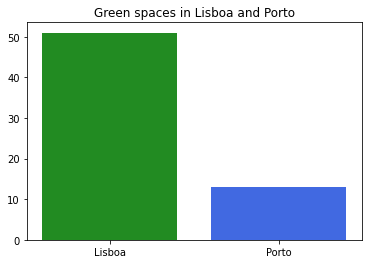

In [18]:
# Comparing the number of green spaces in both locations

plt.bar(x=["Lisboa", "Porto"], 
        height=[green_df[green_df.city == 'Lisboa']['Green_Zone_name'].nunique(), green_df[green_df.city == 'Porto']['Green_Zone_name'].nunique()],
        color = ['forestgreen', 'royalblue'])

plt.title('Green spaces in Lisboa and Porto')
plt.show()

### Lisbon vs. Porto - first insights 

- There are a lot more green spaces in lisbon than in Porto (at least in this dataset).

- It's important to note that Porto already has some projects in development to rehabilitate and expand the already built green spaces. So, although it seems like it wasn't a priority in the past, Porto is taking some steps to turn 'greener'. This topic will be expanded in the conclusion, with links to the information sources.

- Most of the green areas in Lisbon are really condensend in the 'old'/turistic part of town and closer to the sea, although we can actually see some green spaces in urban areas of the perifery, like São Domingos de Benfica and Carnide.

In [64]:
# Sorting our dataframe by demand

geo_df.sort_values(by="Green Zones Daily Average Demand", ascending=False).head(3)

Green_Zone_name  Number of Museums in influence area  \
42    JRD. CP. VINTE E QUATRO DE AGOSTO                                    0   
34  JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN                                   92   
44           PARQUE DA CIDADE DE LOURES                                    1   

    Number of parking lots in influence area  \
42                                         1   
34                                        93   
44                                         9   

    Number of tourist attractions in influence area  \
42                                                0   
34                                               58   
44                                                4   

    Green Zones Daily Average Demand  \
42                       3193.372906   
34                       1291.870084   
44                       1047.505649   

    Daily average of people in influence area  \
42                               52834.126879   
34                               36577.848107   
44                                6008.626849   

    Daily average of people in influence area (Non-Residents)  \
42                                       16782.664422           
34                                       30892.425376           
44                                       17235.051457           

    Number of buildings in influence area  \
42                                   5428   
34                                   3521   
44                                   5028   

    Number of families in influence area  \
42                                 10994   
34                                 24581   
44                                 10598   

    Number of people resident in influence area  perc_senior_pop  \
42                                        24265         0.271337   
34                                        59559         0.161672   
44                                        27362         0.161501   

    perc_pop_until_19_yo   POINT_X   POINT_Y    city  \
42              0.149062 -8.598670  41.14934   Porto   
34              0.197283 -9.155130  38.73805  Lisboa   
44              0.209341 -9.161535  38.82598  Lisboa   

                            geometry  
42   POINT (-957199.566 5034394.297)  
34  POINT (-1019144.410 4684218.640)  
44  POINT (-1019857.411 4696775.266)

### Demand Insights 

- Maybe unexpectedly, Porto has the green space that is most visited: [Campo 24 de Agosto](https://pt.wikipedia.org/wiki/Campo_de_Vinte_e_Quatro_de_Agosto) is the most visited (by far!) with no museums and only 1 parking lot! Surprising! **But why?** The reason is simple: **it's a huge accessibility center: the bus stops are huge and there is a huge variety of destinations that citizens can access through this point, either from bus or from train.** This is the most important factor for this green space in specific and it's not reflected in this dataset.

- Regarding second park with the most affluence, although having great accessibility too (subway, numerous bus stops and even a great number of parking lots), people go there mainly for **culture and/or leisure time**. [Gulbenkian](https://gulbenkian.pt/jardim/) always has multiple cultural events happening, from art exhibitions to live concerts or cinema being reproduced. It is also a really important cultural mark in the city. The garden is also open to the public and really well maintained and conserved, which makes it a really well-known attraction in the middle of a very urban part of town. Again, this "purpose" factor is not reflected in the dataset.

- The third most demanded park, [Parque da Cidade de Loures](https://www.allaboutportugal.pt/pt/loures/jardins/parque-da-cidade-de-loures), also serves a completely different purpose: **it's mainly a family place,** with two parks for kids with activities for them and a space/big gymnasium that is used for several sports pratice or different activities

The insight taken from this is: **different green spaces have different purposes and that matters when analyzing the demand and understanding what went right and wrong.** Is it a point that unites various transportations points and intersections of the city? Is it of cultural importance? Is it for kids and families? Is it close to a viewpoint (a.k.a. "miradouro")? Unfortunately, this variable is not created in our dataset, but it's something that we think would help a model perform and to understand in general the demand for these spaces in different locations of the cities. It would be enough to create a column called "purpose" with maybe less than 10 different categorical values that it could take.

Another insight is that **there is no demand if there is no accessibility**. All the top gardens have great access, either by road or by public transportation. This is crucial for the success of a green space and is crucial for making the community engaged with the space. It's really important to have this in mind when picking where the next green spaces should be built. That's why we recommend to unite this dataset with a column named "Number of Public Transportation Routes" that represents the number of public transportation routes that one can takes from there and from where the population can come from.

In [20]:
df_lisboa = green_df[green_df['city'] == 'Lisboa']

df_porto = green_df[green_df['city'] == 'Porto']

df_lisboa

Green_Zone_name  Number of Museums in influence area  \
1           JARDIM AFONSO DE ALBUQUERQUE                                   93   
2    JARDIM ALAMEDA CIDADE UNIVERSITÁRIA                                    8   
3    JARDIM ALAMEDA DOM AFONSO HENRIQUES                                  105   
4                JARDIM AMÁLIA RODRIGUES                                    8   
5              JARDIM AMÉLIA CARVALHEIRA                                  104   
6                   JARDIM ANTÓNIO NOBRE                                   93   
7                  JARDIM AVELAR BROTERO                                   10   
9                   JARDIM BENTO MARTINS                                    5   
10                JARDIM BOTÂNICO LISBOA                                  105   
12               JARDIM BRAAMCAMP FREIRE                                   99   
13                    JARDIM CONSTANTINO                                  105   
16                         JARDIM DA LUZ                                    0   
17            JARDIM DA RIBEIRA DAS NAUS                                   72   
18                  JARDIM DAS AMOREIRAS                                   13   
19                     JARDIM DE BUCELAS                                    0   
20           JARDIM DE LOPES DE MENDONÇA                                   97   
21                      JARDIM DE SANTOS                                   77   
23                JARDIM DO ARCO DO CEGO                                   91   
24                JARDIM DO CAMPO GRANDE                                  107   
25               JARDIM DO CAMPO PEQUENO                                  104   
27      JARDIM DO PALÁCIO DE BEAU-SÉJOUR                                    1   
29               JARDIM DO PRÍNCIPE REAL                                   73   
30                     JARDIM DOM LUÍS I                                  101   
31                 JARDIM FERNANDO PESSA                                   82   
32      JARDIM FRANCISCO CALDEIRA CABRAL                                    2   
34   JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN                                   92   
35                   JARDIM GARCIA DORTA                                    3   
36                     JARDIM IRMÃ LÚCIA                                   14   
37        JARDIM JOÃO FREDERICO LUDOVICE                                    1   
38                  JARDIM LISBOA ANTIGA                                   73   
39                  JARDIM NOVE DE ABRIL                                  106   
41     JARDIM PROF. ANTÓNIO SOUSA FRANCO                                   90   
43                       MATA DE BENFICA                                    0   
44            PARQUE DA CIDADE DE LOURES                                    1   
46                      PARQUE DOS ANJOS                                   46   
47                    PARQUE EDUARDO VII                                  107   
48       PARQUE INFANTIL CONDE DE BONFIM                                    1   
49                PARQUE INFANTIL DO IPO                                   28   
50      PARQUE INFANTIL PRAÇA DE LONDRES                                   12   
51                   PARQUE JOSÉ FONTANA                                  107   
52    PARQUE RECREATIVO ALTO DA SERAFINA                                   55   
53     PARQUE URBANO DA QUINTA DA GRANJA                                    4   
54          PARQUE URBANO DA QUINTA NOVA                                    0   
55           PARQUE URBANO DO CASTELINHO                                    0   
56              PARQUE URBANO DO SILVADO                                    1   
57    PQ. INFA. JARD. MARQUÊS DE MARIALA                                   36   
58      PQ. INFA. JARDIM GOMES DE AMORIM                                   90   
59     PQ. INFANTIL AV. MARQUÊS DE TOMAR                                  111   
60  PQ. INFANTIL HOSPITAL DE SANTA MARIA                

In [21]:
y = df_lisboa[['Green Zones Daily Average Demand']]

X = df_lisboa.loc[:, df_lisboa.columns != 'Green Zones Daily Average Demand'].iloc[:, 1:-4]

In [23]:
def correlation_matrix(data_df):
        """Builds the correlation matrix with the respective columns and returns it

        Returns:
        -------

            plt.show(): returns plt graph that is a correlation matrix between
            some of the relevant variables in the dataset.
        """

        df_corr = data_df
        corr_matrix = df_corr.corr()
        plt.subplots(figsize=(12, 8))

        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(200, 20, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(
            corr_matrix,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=0.3,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.5},
        )

        plt.title("\nCorrelation Matrix", {"fontsize": 16})

        return plt.show()

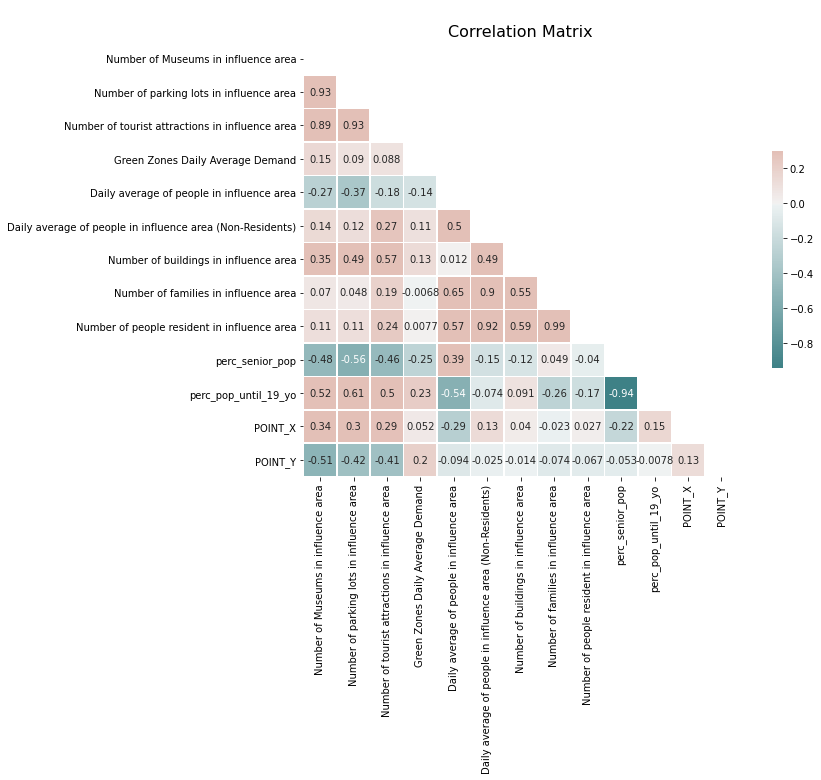

In [24]:
correlation_matrix(df_lisboa)

### Relevant Green Zones Demand Correlation in Lisbon: 

There are 2 important **positive correlations** with Green Areas demand:

- Percentage of people until 19 years old (23% correlation): Does this mean the green spaces are used by families and teenagers? It's something that we have to investigate further.

- Number of Museums in Influence Area (15% correlation): Most of the green spaces are used by people that go see turist/cultural attractions? Is it mainly used by tourists? These are all questions that would be important to clear out.


There is 1 important **negative correlation** with Green Areas demand:

- Percentage of Senior Population (-25%): Why don't senior people in the area use the green areas? Is it because there are a lot of ups and downs in the streets when you go to the green areas by foot? How is the accessbility for senior people to reach these areas? Most probably something has to be done about this (if it's the real cause, something we can't infer from correlation).

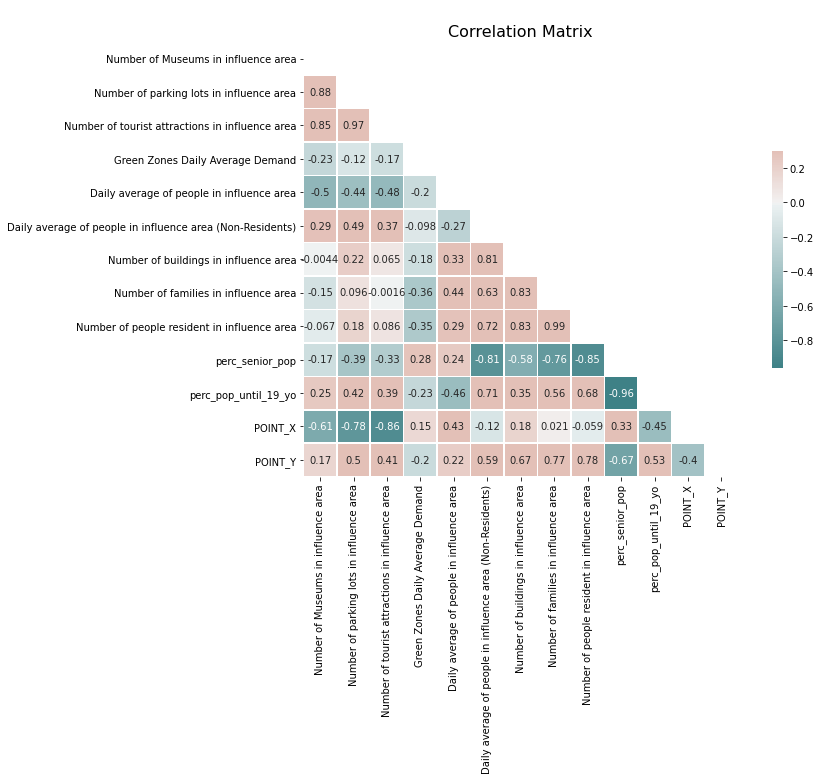

In [25]:
correlation_matrix(df_porto)

### Relevant Green Zones Demand Correlation in Porto: 

- The correlation distribution is vastly different in Porto. For example, most of the variables have a negative correlation, something that isn't seen in Lisbon's case.

- Another interesting point is that the percentage of senior population is the variable with the highest positive correlation and the percentage population until 19 years old is actually the variable with the highest negative correlation! Are the two cities that different? Or was it about the parks that were included for Porto?

- A possible explanation for this difference between the two cities is that we have a ver low number of data points in both datasets (especially the Porto one) making this analysis biased.

---

## Important Decision Here:

Due to the very low amount of parks in Porto in the dataset, we have decided to **work with Lisbon parks only**. Although this entails reducing the total datapoints even further, it increases the consistency (crucial for model accuracy), since the correlations are so different for Porto parks. Another reason for this decision was that we could not find data on the metro stations for the city of Porto, something we need in order to build a model that considers the distance between the Parks and metro stations as a feature (done below).

---

## Baseline Model - Lisbon Data

In [ ]:
# code

### Baseline Model Insights:

- abc
- cba

---

## Getting a Better Model

In [ ]:
# code

### Best Model Insights:

- The best model is **(...)**. Assuming this is the model that performs better in all situations, this is the model we will continue with for the last analysis: **parks near vs far away from metro stations**.
- (...)

---

## Best Model Applied to Accessible vs. Non Acessible Parks (Lisbon)

#### Getting metro station coordinates in Lisbon:

In [8]:
link  = 'https://services.arcgis.com/1dSrzEWVQn5kHHyK/arcgis/rest/services/POITransportes/FeatureServer/2/query?where=1%3D1&outFields=*&f=pgeojson'

with urllib.request.urlopen(link) as url:
    data = json.loads(url.read().decode())

In [9]:
# Getting both the station name and coordinates into a dictionary
dic = {}
for i in range(len(data['features'])):
    dic[data['features'][i]['properties']['INF_NOME']] = data['features'][i]['geometry']['coordinates']

In [10]:
metro_df = pd.DataFrame()
metro_df['station_name'] = dic.keys()
metro_df['coordinates'] = dic.values()

In [11]:
metro_df.head()

station_name                            coordinates
0            Chelas  (-9.11391723740532, 38.7549445533084)
1          Alvalade  (-9.14401263737641, 38.7531285992408)
2        Intendente  (-9.13523921600122, 38.7230823966241)
3  Alto dos Moinhos  (-9.18001577188089, 38.7498812634593)
4     São Sebastião  (-9.15385312166352, 38.7343309951123)

In [12]:
# Getting the latitude and longitude off the coordinates and into new columns
metro_df['latitude'] = metro_df['coordinates'].apply(lambda x: x[0])
metro_df['longitude'] = metro_df['coordinates'].apply(lambda x: x[1])

In [13]:
metro_df.drop(columns='coordinates', inplace=True)

In [14]:
metro_df.head(10)

station_name  latitude  longitude
0            Chelas -9.113917  38.754945
1          Alvalade -9.144013  38.753129
2        Intendente -9.135239  38.723082
3  Alto dos Moinhos -9.180016  38.749881
4     São Sebastião -9.153853  38.734331
5     Restauradores -9.142012  38.715756
6      Martim Moniz -9.135882  38.717412
7  Praça de Espanha -9.159332  38.737685
8        Cabo Ruivo -9.105134  38.762932
9   Colégio Militar -9.189273  38.753201

#### Calculating the distance between each green park and its closest metro station in Lisbon:

In [ ]:
# code

#### Creating an "accessible" column that is 1 if the distance to the closest park is below 200m and has over 1 parking spot per 10 units of demand:

In [ ]:
# code

#### Applying the best model to the resulting data:

In [ ]:
# code

### Accessible vs. Non Acessible Parks - Model Insights:

- (...)**MT IMPORTANTE**
- (...)**MT IMPORTANTE**

---

## Conclusions

### Scalability and Impact

#### General Contextual Insights

- Parks near university establishments have some of the greatest demand overall, and must be seized to promote a green lifestyle among students, as well as promoting other green spaces with less demand and great potention for young users.

#### Activities vs. Nature

- While functionality and activities (restaurants, sports fields, playgrounds, etc) matter a lot, in the age of humans needing to take a break off their stressed lives and overwhelming technology, nature and beauty seem to matter more and more.

- This is more of a hint that municipalities need to merge the concepts than that they should choose one, and this is happening: in the Quinta da Boavista, Maia, Porto (not in the dataset), for instance, a [restaurant](https://www.timeout.pt/porto/pt/noticias/maia-ha-uma-nova-esplanada-no-meio-da-natureza-052021) has been opened in the depths of nature that really captures this symbiosis.

- Improving and scaling this situation is a question of design. As suggested in the literature, the role of Green Park Designer must be embodied by professionals that tailor each park's design to its surroundings and communities).

- The importance of the nature and design attributes is also backed by TimeOut's latest [park recommendations in Lisbon](https://www.timeout.pt/lisboa/pt/coisas-para-fazer/os-melhores-parques-e-jardins-de-lisboa), which has emphasis on parks with either a lot of nature or that have been subject to restructuring or construction.

#### Lisbon vs. Porto

##### Porto
- In general Porto seems to have way less green parks than Lisbon, which is reflected in this dataset. However, the city of Porto seems to be commited to closing this gap, notably through a more than €10 million [project](https://www.publico.pt/2020/11/23/local/noticia/camara-porto-seis-projectos-reabilitacao-expansao-parques-jardins-1940318), due to start this year, for the of **rehabilitation and expansion** of 6 of the City's parks.

- One of these parks is the **Jardim da Corujeira, present in the dataset**. This project is a much needed operation to a park that clearly needed rehabilitation, and that could have great potential. Notably, it currently only has **7 parking lots** within its influence area, and our recommendation is for the city hall to include more if they want to make the park more attractive, given that there are no metro stations nearby (only two bus stations). This kind of analysis, when scaled to all parks, can really impact the future of park accessibility.

- Porto has the park with **the most affluence by far, Jardim 24 de Agosto**, characterized by the surrounding public transportation access points very close - Metro lines A, B, C, E, and F (that's a lot of lines!) and [one of the major bus terminals in the city with buses that transport, annually, about 1.5 million passengers](https://pt.wikipedia.org/wiki/Terminal_Rodovi%C3%A1rio_do_Campo_24_de_Agosto). While this park only has 1 parking lot in its influence area, this is not such an important feature becuase of the public transportation factor, responsible for most people's presence there in the first place. This is an example of the nuance that must be considered in this kind of analysis.

- (...)**MAIN INSIGHT FROM CORRELATION PLOT**

##### Lisbon
- Lisbon was the Green European Capital of 2020, the recogniton of an effort for the past and future that goes way beyond green parks but that has this compontent too: the city has [**compromised to have 25% of the city with green spaces until 2022**](https://observador.pt/2020/03/12/lisboa-a-capital-verde-europeia-que-esta-em-festa/).

- There has been a trend for quite some time in Lisbon to build more cycling roads, changing how roads are built and the addition of even more green social places. A very important segment of the city called [Praça de Espanha has been revamped and updated to be more green, more of a leisure space and (much) less traffic intense than before](https://www.lisboa.pt/nova-praca-de-espanha).

- (...)**MAIN INSIGHT FROM CORRELATION PLOT**

- (...)**MAIN INSIGHT FROM THE MODEL**

#### Parks near metro stations vs. parks far away

- (...)**HOW MANY THERE ARE OF EACH: HOW IS THE BALANCE**

- (...)**MAIN INSIGHT FROM THE MODEL**


#### Summary of Recommendations for Municipalities

- **Accessibility**: while being an absolute key, but it is not necessary for all requirements to be filled. For instance, if a park has a lot of public transportation options, it is not so crucial for it to have that many parking lots available. A good balance in the cities must be achived, and of course the preference (especially for city-centre parks) must continue to be less parking lots and more public transportation options. In this regard, the dataset seems to be well balanced.

- (...)**NEED MORE**

---

### Future Work


- **Collect more data on:**:

    1. **Park Purpose** - parks must be categorized, especially according to what factos attract people there (i.e. what the park's role is in the community). Some parks do that through cultural events, like the Calouste Gulbenkian park in Lisbon, while others do that by having important public transportation stations around, like the Jardim 24 de Agosto, in Porto. There are several other characteristics that attract people, and it would be **absolutely crucial for minicipalities to start measuring, recordinding, and classifying these**. This would allow municipalities to know exactly **how to improve each park specifically by understanding how to better design the spaces for their different surroundings and communities.**
    
    2. **Accessibility** - while a count of parking lots is available in this dataset, each park must have, clearly identified and reflected in town hall databases, all its accessibility options.
    
    3. **Time spent on the parks** - in the future, it would be great to extract data on how the rough average time spent by people in each park, so that their purpose can be understood in even more depth, enabling an even better fitted design to each park.
    
##### Without these two crucial factors, a lot of general information is lost. This information is specifically important because it applies to **all parks**, and having it would enable the construction of much more comprehensive and generalizable models that could then be applied to predict demand much more accurately.


